# Emergency Rooms in relationship to Assisted Living Facilities in Austin and Surrounding Areas

In [1]:
# Dependencies
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from matplotlib import pyplot as plt
import requests
import json
import gmaps
from config import api_key
# Use google maps api
gmaps.configure(api_key=api_key) 


## Get the data from the csv files

In [2]:
# read the csv data file and store 
# Hospital in the west area of Austin within a 5 mi radius
hospital_west = "hospital_west.csv"
hosp_west_pd = pd.read_csv(hospital_west)
hosp_west_pd

,Name,Lat,Long,Id,Address,Rating
0,Emergency Room - Seton Northwest Hospital,30.405378,-97.743808,ChIJnx7nsYnMRIYRH-n47pyHAOs,"11113 Research Blvd, Austin",2.0
1,St. David's Children's Hospital Emergency Room,30.410905,-97.707067,ChIJqZtZlxnMRIYR-t1cMRFeSZM,"12221 N Mopac Expy, Austin",2.3
2,Family Emergency Room Brushy Creek Surgical Ho...,30.496352,-97.723015,ChIJD3dcZNjTRIYRG5LbmSlwS7c,"230 Deer Ridge Dr, Austin",0.0
3,St. David's Round Rock Medical Center Emergenc...,30.511050,-97.712997,ChIJCQ3ZFzzSRIYRBghuNdz-cwI,"2400 Round Rock Ave, Round Rock",3.7
4,St. David's North Austin Medical Center,30.411511,-97.706209,ChIJC8wxpxnMRIYRykgSIszZVJI,"12221 N Mopac Expy, Austin",3.2
5,Cedar Park Regional Medical Center - Emergency...,30.532172,-97.811711,ChIJ644Wf-YsW4YRPz9Lx7UY-yQ,"1401 Medical Pkwy, Cedar Park",4.3
6,Family Emergency Room at Round Rock,30.493079,-97.655346,ChIJc2C2V9PRRIYRsl0W_Q9fAEQ,"1925 A.W. Grimes Blvd, Round Rock",4.7
7,St. David's Round Rock Medical Center,30.511011,-97.713722,ChIJOVVimz7SRIYRx1VAioP3C-Q,"2400 Round Rock Ave, Round Rock",3.3
8,Austin Emergency Center- Anderson Mill,30.449240,-97.787818,ChIJ8fVr9cwyW4YRI3kv2yQSU8Q,"13435 US Hwy. 183 N, Ste. 311, Austin",4.6
9,St. David's Emergency Center - Cedar Park,30.475138,-97.800803,ChIJh_I4tqAyW4YRC6xUJ_D2QpY,"14016 N, US-183, Austin",2.5


In [3]:
# read the csv data file and store 
# Hospital in the south area of Austin within a 5 mi radius
hospital_south = "hospital_south.csv"
hosp_south_pd = pd.read_csv(hospital_south)
hosp_south_pd

,Name,Lat,Long,Id,Address,Rating
0,Physicians Premier Emergency Room - Bastrop,30.107516,-97.338259,ChIJq7pkCDuaRIYRiBWitqSWlWM,"512 TX-71, Bastrop",4.9
1,St. David's Emergency Center - Bastrop,30.103210,-97.292470,ChIJhb0CKeSaRIYRoKxsPMWc4qs,"3201 TX-71, Bastrop",2.1
2,FastMed Urgent Care,30.112715,-97.352455,ChIJVxMWjIqZRIYRNVv1FPYaJGE,"717 TX-71 #500, Bastrop",3.8
3,Trinity Tabernacle,30.090982,-97.600199,ChIJL6yojm-lRIYRDwgkEMMU5AU,"Cam Del Sol, Del Valle",0.0


In [4]:
# read the csv data file and store 
# Hospital in the north area of Austin within a 5 mi radius
hospital_north = "hospital_north.csv"
hosp_north_pd = pd.read_csv(hospital_north)
hosp_north_pd

,Name,Lat,Long,Id,Address,Rating
0,Emergency Room - Seton Northwest Hospital,30.405378,-97.743808,ChIJnx7nsYnMRIYRH-n47pyHAOs,"11113 Research Blvd, Austin",2.0
1,St. David's Children's Hospital Emergency Room,30.410905,-97.707067,ChIJqZtZlxnMRIYR-t1cMRFeSZM,"12221 N Mopac Expy, Austin",2.3
2,Family Emergency Room Brushy Creek Surgical Ho...,30.496352,-97.723015,ChIJD3dcZNjTRIYRG5LbmSlwS7c,"230 Deer Ridge Dr, Austin",0.0
3,St. David's Round Rock Medical Center Emergenc...,30.511050,-97.712997,ChIJCQ3ZFzzSRIYRBghuNdz-cwI,"2400 Round Rock Ave, Round Rock",3.7
4,St. David's North Austin Medical Center,30.411511,-97.706209,ChIJC8wxpxnMRIYRykgSIszZVJI,"12221 N Mopac Expy, Austin",3.2
5,Cedar Park Regional Medical Center - Emergency...,30.532172,-97.811711,ChIJ644Wf-YsW4YRPz9Lx7UY-yQ,"1401 Medical Pkwy, Cedar Park",4.3
6,Family Emergency Room at Round Rock,30.493079,-97.655346,ChIJc2C2V9PRRIYRsl0W_Q9fAEQ,"1925 A.W. Grimes Blvd, Round Rock",4.7
7,St. David's Round Rock Medical Center,30.511011,-97.713722,ChIJOVVimz7SRIYRx1VAioP3C-Q,"2400 Round Rock Ave, Round Rock",3.3
8,Austin Emergency Center- Anderson Mill,30.449240,-97.787818,ChIJ8fVr9cwyW4YRI3kv2yQSU8Q,"13435 US Hwy. 183 N, Ste. 311, Austin",4.6
9,St. David's Emergency Center - Cedar Park,30.475138,-97.800803,ChIJh_I4tqAyW4YRC6xUJ_D2QpY,"14016 N, US-183, Austin",2.5


In [5]:
# read the csv data file and store 
# Hospital in the overview area of Austin
# This is a 20 mi radius from the center of Austin.
hospital_overview = "hospital_overview.csv"
hosp_overview_pd = pd.read_csv(hospital_overview)
hosp_overview_pd

,Name,Lat,Long,Id,Address,Rating
0,Northwest Hills Surgical Hospital: Emergency Room,30.350503,-97.751802,ChIJIV9EpQTLRIYRh1BoYp6AOuQ,"6818 Austin Center Blvd, Austin",0.0
1,Heart Hospital of Austin,30.305934,-97.741206,ChIJ21hN8n3KRIYRcFnDZLVfRdw,"3801 N Lamar Blvd, Austin",4.1
2,Dell Children's Medical Center of Central Texa...,30.303784,-97.706794,ChIJiRc6sAfKRIYRmOzVy1A6n6M,"4900 Mueller Blvd, Austin",2.8
3,Emergency Room - Seton Medical Center Austin,30.304519,-97.746197,ChIJBx8ds4bKRIYRwhm9ceqdNvI,"1201 W 38th St, Austin",2.7
4,The Hospital at Westlake Medical Center: Emerg...,30.295748,-97.825619,ChIJExNrRn41W4YRfC4FiQ8BYAo,"5656 Bee Caves Rd, West Lake Hills",3.0
5,Emergency Room - Seton Northwest Hospital,30.405378,-97.743808,ChIJnx7nsYnMRIYRH-n47pyHAOs,"11113 Research Blvd, Austin",2.0
6,Dell Children's Medical Center of Central Texas,30.303609,-97.706519,ChIJY6OBqQfKRIYRreSi47pbrV0,"4900 Mueller Blvd, Austin",3.7
7,Arise Austin Medical Center: Emergency Room,30.270891,-97.795905,ChIJaf9xdshKW4YRny4bPyy-nO8,"3003 Bee Caves Rd, Austin",5.0
8,St. David's Medical Center,30.289936,-97.725895,ChIJg3bS4Y21RIYREr5TRa1Lf1Q,"919 E 32nd St, Austin",3.5
9,Austin Emergency Center - Mueller,30.301650,-97.698967,ChIJNfUvvZ7LRIYRlCZXFVa4XD8,"1801 E 51st St Bldg. H, Austin",4.9


In [6]:
# read the csv data file and store 
# Hospitals in the east area of Austin within a 5 mi radius
hospital_east = "hospital_east.csv"
hosp_east_pd = pd.read_csv(hospital_east)
hosp_east_pd


,Name,Lat,Long,Id,Address,Rating
0,FastMed Urgent Care,30.34996,-97.545856,ChIJXS06AyLHRIYRSXrOLFghGQg,"14008 Shadow Glen Blvd #100, Manor",4.3


In [7]:
# read the csv data file and store 
# Hospitals in the central area of Austin within a 5 mi radius
hospital_central = "hospital_central.csv"
hosp_central_pd = pd.read_csv(hospital_central)
hosp_central_pd


,Name,Lat,Long,Id,Address,Rating
0,Heart Hospital of Austin,30.305934,-97.741206,ChIJ21hN8n3KRIYRcFnDZLVfRdw,"3801 N Lamar Blvd, Austin",4.1
1,Dell Children's Medical Center of Central Texa...,30.303784,-97.706794,ChIJiRc6sAfKRIYRmOzVy1A6n6M,"4900 Mueller Blvd, Austin",2.8
2,Emergency Room - Seton Medical Center Austin,30.304519,-97.746197,ChIJBx8ds4bKRIYRwhm9ceqdNvI,"1201 W 38th St, Austin",2.7
3,The Hospital at Westlake Medical Center: Emerg...,30.295748,-97.825619,ChIJExNrRn41W4YRfC4FiQ8BYAo,"5656 Bee Caves Rd, West Lake Hills",3.0
4,St. David's Medical Center,30.289936,-97.725895,ChIJg3bS4Y21RIYREr5TRa1Lf1Q,"919 E 32nd St, Austin",3.5
5,Dell Children's Medical Center of Central Texa...,30.303408,-97.706939,ChIJm8lJFQfKRIYR_nZHP3bBWww,"4900 Mueller Blvd, Austin",1.0
6,Arise Austin Medical Center: Emergency Room,30.270891,-97.795905,ChIJaf9xdshKW4YRny4bPyy-nO8,"3003 Bee Caves Rd, Austin",5.0
7,Austin Emergency Center - Mueller,30.301650,-97.698967,ChIJNfUvvZ7LRIYRlCZXFVa4XD8,"1801 E 51st St Bldg. H, Austin",4.9
8,Dell Seton Medical Center at The University of...,30.276254,-97.734146,ChIJV1Wle6K1RIYRzsfCMOQJYxA,"1500 Red River St, Austin",2.8
9,Ascension Seton Medical Center Austin,30.305078,-97.746085,ChIJ44CyyYbKRIYRc59df6kDbQ4,"1201 W 38th St, Austin",3.3


In [8]:
# read the csv data file and store 
# Assisted living facilities in the central area of Austin within a 5 mi radius
alf_central = "alf_central.csv"
alf_central_pd = pd.read_csv(alf_central)
alf_central_pd.head()


,Name,Lat,Long,Id,Address,Rating
0,The Village at The Triangle,30.313358,-97.734146,ChIJaVrQ-WTKRIYR0lEg-VRkQRA,"4517 Triangle Ave, Austin",4.9
1,Parsons House Austin,30.324457,-97.696647,ChIJjW3GNfXJRIYR6AsP5IwOOPU,"1130 Camino La Costa, Austin",4.0
2,Barton Hills Assisted Living,30.252569,-97.768689,ChIJ44aMtCC1RIYRFkROxW1rbe4,"1606 Nash Ave, Austin",4.3
3,Belmont Village Senior Living West Lake Hills,30.287426,-97.812960,ChIJs4k05ptKW4YRk0IaVnJ-fYY,"4310 Bee Caves Rd, Austin",3.9
4,Southern Hospitality Home,30.322934,-97.742987,ChIJtfeWQPXKRIYRU0qws_Dk9Vk,"5000 Shoalwood Ave, Austin",5.0


In [9]:
# read the csv data file and store 
# Assisted living facilities in the east area of Austin within a 5 mi radius
alf_east = "alf_east.csv"
alf_east_pd = pd.read_csv(alf_east)
alf_east_pd.head()

,Name,Lat,Long,Id,Address,Rating
0,Colonial Gardens Memory Care Assisted Living o...,30.421463,-97.714473,ChIJISNrXDnMRIYRlktveVo9kzM,"3700 Adelphi Ln, Austin",4.0
1,Tech Ridge Oaks Assisted Living and Memory Care,30.396595,-97.666510,ChIJXZ0dRM3ORIYR1atdHYGo1pU,"400 E Yager Ln, Austin",5.0
2,Hampton Senior Living LLC,30.490106,-97.661233,ChIJY5jsiNbRRIYR3DhILBRZkPw,"1905 Hampton Ln, Round Rock",3.0
3,Round Rock Assisted Living,30.502184,-97.732012,ChIJU5oIN2bSRIYRLesjuAfvShE,"16708 Marsala Springs Dr, Round Rock",5.0
4,The Heritage at Hunters Chase,30.439938,-97.776265,ChIJNeCxzSjNRIYROp6dsdt6NZU,"12151 Hunters Chase Dr, Austin",4.0


In [10]:
# read the csv data file and store 
# Assisted living facilities in the north area of Austin within a 5 mi radius
alf_north = "alf_north.csv"
alf_north_pd = pd.read_csv(alf_north)
alf_north_pd.head()

,Name,Lat,Long,Id,Address,Rating
0,Colonial Gardens Memory Care Assisted Living o...,30.421463,-97.714473,ChIJISNrXDnMRIYRlktveVo9kzM,"3700 Adelphi Ln, Austin",4.0
1,Tech Ridge Oaks Assisted Living and Memory Care,30.396595,-97.666510,ChIJXZ0dRM3ORIYR1atdHYGo1pU,"400 E Yager Ln, Austin",5.0
2,Hampton Senior Living LLC,30.490106,-97.661233,ChIJY5jsiNbRRIYR3DhILBRZkPw,"1905 Hampton Ln, Round Rock",3.0
3,Round Rock Assisted Living,30.502184,-97.732012,ChIJU5oIN2bSRIYRLesjuAfvShE,"16708 Marsala Springs Dr, Round Rock",5.0
4,The Heritage at Hunters Chase,30.439938,-97.776265,ChIJNeCxzSjNRIYROp6dsdt6NZU,"12151 Hunters Chase Dr, Austin",4.0


In [11]:
# read the csv data file and store 
# Assisted living facilities in the south area of Austin within a 5 mi radius
alf_south = "alf_south.csv"
alf_south_pd = pd.read_csv(alf_south)
alf_south_pd

,Name,Lat,Long,Id,Address,Rating
0,Argent Court Assisted Living,30.110512,-97.336147,ChIJbXFgDzyaRIYRM-IXwZp1sWg,"508 Old Austin Hwy, Bastrop",4.2
1,New Haven Assisted Living of Bastrop,30.105285,-97.293553,ChIJuxUUnOWaRIYRQtTN9Nb-6zE,"W, 2604, TX-71 E, Bastrop",3.6
2,Riverwood Commons,30.109687,-97.331614,ChIJdw3EvjiaRIYRv55-_6eGBds,"440 Old Austin Hwy, Bastrop",4.8


In [12]:
# read the csv data file and store 
# Assisted living facilities in the west area of Austin within a 5 mi radius
alf_west = "alf_west.csv"
alf_west_pd = pd.read_csv(alf_west)
alf_west_pd

,Name,Lat,Long,Id,Address,Rating
0,Brookside Farm,30.397386,-97.633814,ChIJD-INTzXPRIYRevTSnn0Zaxs,"2213 E Howard Ln, Manor",0.0
1,Country Vista,30.357021,-97.496747,ChIJfdaaXOLARIYRzP5tV4YYQ4g,"13356 Old Kimbro Rd, Manor",0.0
2,Oakcrest Manor Nursing Home,30.330534,-97.619431,ChIJx0e7H3PIRIYRoRxm6wEgagk,"9808 Crofford Ln, Austin",4.3


In [13]:
# read the csv data file and store 
# Assisted living facilities in the overview area of Austin
# This is a 20 mi radius from the center of Austin.
alf_overview = "alf_overview.csv"
alf_overview_pd = pd.read_csv(alf_overview)
alf_overview_pd

,Name,Lat,Long,Id,Address,Rating
0,The Village at The Triangle,30.313358,-97.734146,ChIJaVrQ-WTKRIYR0lEg-VRkQRA,"4517 Triangle Ave, Austin",4.9
1,Longhorn Village,30.350509,-97.909587,ChIJzzFgDeQ2W4YR5MAvsZinZUg,"12501 Longhorn Pkwy, Austin",4.5
2,Solstice Senior Living at Austin,30.222947,-97.801825,ChIJeWADLkFLW4YRn9Vo_hsLLZ0,"2603 Jones Rd, Austin",3.8
3,Querencia At Barton Creek,30.290464,-97.867879,ChIJcxmf7wBKW4YRMfrDfF4CQ9o,"2500 Barton Creek Blvd, Austin",3.9
4,Belmont Village Senior Living West Lake Hills,30.287426,-97.812960,ChIJs4k05ptKW4YRk0IaVnJ-fYY,"4310 Bee Caves Rd, Austin",3.9
5,Atria at the Arboretum,30.392365,-97.757326,ChIJCybSzp3MRIYRCinqw-V0VOg,"9306 Great Hills Trail, Austin",4.7
6,The Continental Retirement Community,30.234078,-97.803268,ChIJlS2aRDxLW4YRLGC6n7T3UIM,"4604 S Lamar Blvd, Austin",4.8
7,Court at Round Rock,30.540138,-97.670572,ChIJS1QDhQ7RRIYR1ngW_2EONlk,"2700 Sunrise Rd, Round Rock",4.2
8,Brookdale Home Health Austin,30.362516,-97.748660,ChIJMUPLPQzLRIYRhs9zBkUL564,"3636 Executive Center Dr Suite 216, Bld 8, Austin",0.0
9,Oasis Senior Advisors Austin,30.300459,-97.735347,ChIJX0PDvPLLRIYRflKvtLNpne4,"3710 Cedar St #281, Austin",5.0


## Graph the hospitals by areas in Austin by ratings

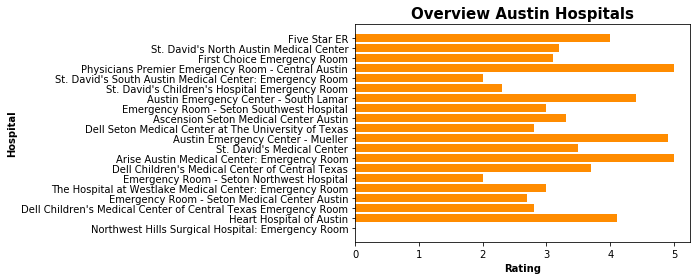

<Figure size 432x288 with 0 Axes>

In [71]:
# Central Austin Hospitals
# Set the title and labels
plt.title("Overview Austin Hospitals", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("Hospital", fontweight='bold')

# Set x axis and tick locations
y_axis = hosp_overview_pd["Rating"]
x_axis = hosp_overview_pd["Name"]
tick_locations = (range(0, len(y_axis)))

# create the horizontal bar graph
plt.barh(x_axis, y_axis, color='darkorange', alpha=1, align="center")
plt.yticks(rotation="horizontal")
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("overview_hosp_ratings.pdf")

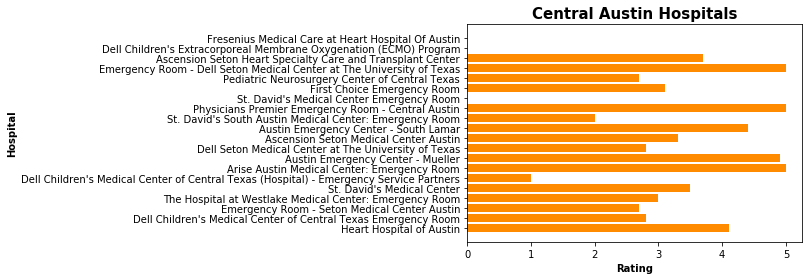

<Figure size 432x288 with 0 Axes>

In [70]:
# Central Austin Hospitals
# Set the title and labels
plt.title("Central Austin Hospitals", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("Hospital", fontweight='bold')

# Set x axis and tick locations
y_axis = hosp_central_pd["Rating"]
x_axis = hosp_central_pd["Name"]
tick_locations = (range(0, len(y_axis)))

# create the horizontal bar graph
plt.barh(x_axis, y_axis, color='darkorange', alpha=1, align="center")
plt.yticks(rotation="horizontal")
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("central_hosp_ratings.pdf")


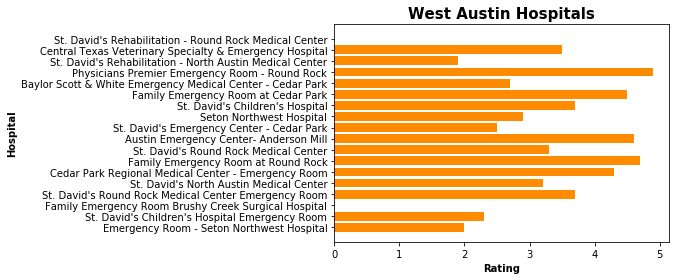

<Figure size 432x288 with 0 Axes>

In [69]:
# West Austin Hospitals
# Set the title and labels
plt.title("West Austin Hospitals", fontweight ='bold', fontsize =15)
plt.ylabel("Hospital", fontweight='bold')
plt.xlabel("Rating", fontweight='bold')

# Set x axis and tick locations
y_axis = hosp_west_pd["Rating"]
x_axis = hosp_west_pd["Name"]
tick_locations = (range(0, len(y_axis)))

# create the horizontal bar graph
plt.barh(x_axis, y_axis, color='darkorange', alpha=1, align="center")
plt.yticks(tick_locations, hosp_west_pd["Name"], rotation="horizontal")
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("west_hosp_ratings.pdf")

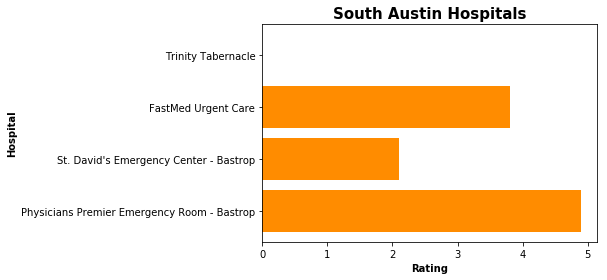

<Figure size 432x288 with 0 Axes>

In [68]:
# South Austin Hospitals
# Set the title and labels
plt.title("South Austin Hospitals", fontweight ='bold', fontsize =15)
plt.ylabel("Hospital", fontweight='bold')
plt.xlabel("Rating", fontweight='bold')

# Set x axis and tick locations
y_axis = hosp_south_pd["Rating"]
x_axis = hosp_south_pd["Name"]
tick_locations = (range(0, len(y_axis)))

# create the horizontal bar graph
plt.barh(x_axis, y_axis, color='darkorange', alpha=1, align="center")
plt.yticks(tick_locations, hosp_south_pd["Name"], rotation="horizontal")
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("south_hosp_ratings.pdf")

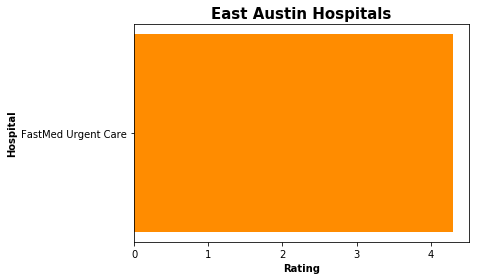

<Figure size 432x288 with 0 Axes>

In [67]:
# East Austin Hospitals
# Set the title and labels
plt.title("East Austin Hospitals", fontweight ='bold', fontsize =15)
plt.ylabel("Hospital", fontweight='bold')
plt.xlabel("Rating", fontweight='bold')

# Set x axis and tick locations
y_axis = hosp_east_pd["Rating"]
x_axis = hosp_east_pd["Name"]
tick_locations = (range(0, len(y_axis)))

# create the horizontal bar graph
plt.barh(x_axis, y_axis, color='darkorange', alpha=1, align="center")
plt.yticks(tick_locations, hosp_east_pd["Name"], rotation="horizontal")
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("east_hosp_ratings.pdf")

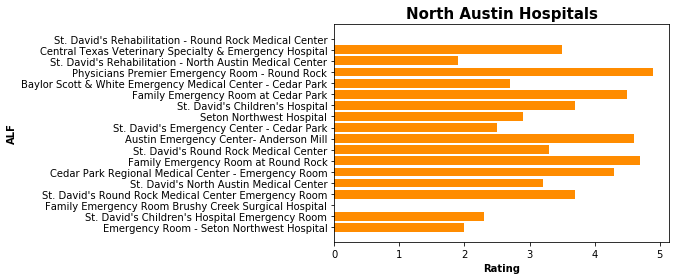

<Figure size 432x288 with 0 Axes>

In [66]:
# North Austin Hospitals
# Set the title and labels
plt.title("North Austin Hospitals", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')

# set the axes
y_axis = hosp_north_pd["Rating"]
x_axis = hosp_north_pd["Name"]

#tick_locations 
tick_locations = (range(0, len(y_axis)))

# create the horizontal bar graph
plt.barh(x_axis, y_axis, color='darkorange', align='center')
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("north_hosp_ratings.pdf")

## Graph the assisted living facilities in the Austin area by ratings.

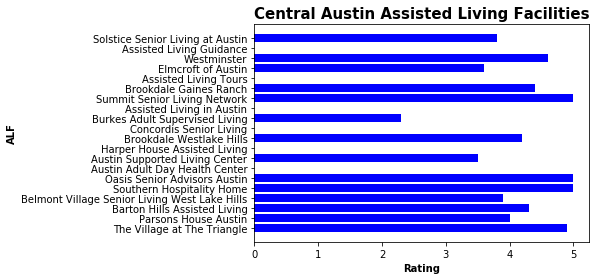

<Figure size 432x288 with 0 Axes>

In [72]:
# North Austin Assisted Living Facilities
# Set the title and labels
plt.title("Central Austin Assisted Living Facilities", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')

# Set x axis and tick locations
#x_axis = np.arange(len(hosp_central_pd))
y_axis = alf_central_pd["Rating"]
x_axis = alf_central_pd["Name"]

alf_central_average = alf_central_pd["Rating"].mean

#tick_locations = [value+0.4 for value in x_axis]
tick_locations = (range(0, len(y_axis)))

plt.barh(x_axis, y_axis, color='blue', align='center')
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("central_alf_ratings.pdf")

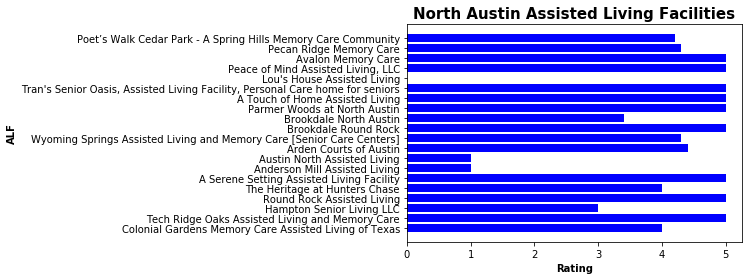

<Figure size 432x288 with 0 Axes>

In [65]:
# North Austin Assisted Living Facilities
# Set the title and labels
plt.title("North Austin Assisted Living Facilities", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')

# Set x axis and tick locations
#x_axis = np.arange(len(hosp_central_pd))
y_axis = alf_north_pd["Rating"]
x_axis = alf_north_pd["Name"]

alf_north_average = alf_north_pd["Rating"].mean

#tick_locations = [value+0.4 for value in x_axis]
tick_locations = (range(0, len(y_axis)))

plt.barh(x_axis, y_axis, color='blue', align='center')
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("north_alf_ratings.pdf")

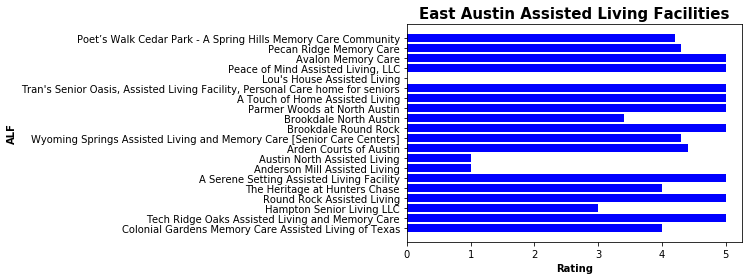

<Figure size 432x288 with 0 Axes>

In [64]:
# East Austin Assisted Living Facilities
# Set the title and labels

plt.title("East Austin Assisted Living Facilities", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')

# Set the axes and tick locations
y_axis = alf_east_pd["Rating"]
x_axis = alf_east_pd["Name"]

alf_east_average = alf_east_pd["Rating"].mean

tick_locations = (range(0, len(y_axis)))

plt.barh(x_axis, y_axis, color='blue', align='center')
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("east_alf_ratings.pdf")

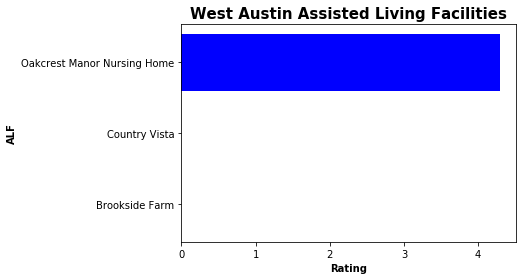

<Figure size 432x288 with 0 Axes>

In [63]:
# West Austin Assisted Living Facilities
# Set the title and labels
plt.title("West Austin Assisted Living Facilities", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')

# Set x axis and tick locations
y_axis = alf_west_pd["Rating"]
x_axis = alf_west_pd["Name"]

alf_west_average = alf_west_pd["Rating"].mean

tick_locations = (range(0, len(y_axis)))

plt.barh(x_axis, y_axis, color='blue', align='center')

fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("west_alf_ratings.pdf")

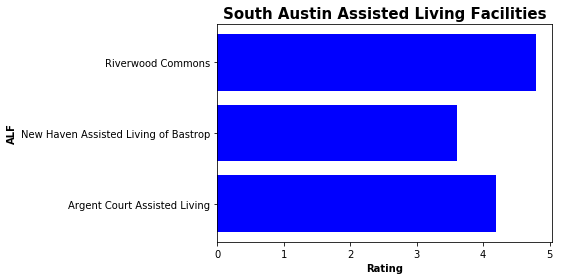

<Figure size 432x288 with 0 Axes>

In [62]:
# South Austin Assisted Living Facilities
# Set the title and labels
plt.title("South Austin Assisted Living Facilities", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')

#set the axes
y_axis = alf_south_pd["Rating"]
x_axis = alf_south_pd["Name"]

#set the average rating
alf_south_average = alf_south_pd["Rating"].mean

#tick_locations = [value+0.4 for value in x_axis]
tick_locations = (range(0, len(y_axis)))

# use horizontal bar graph
plt.barh(x_axis, y_axis, color='blue', align='center')

fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("south_alf_ratings.pdf")

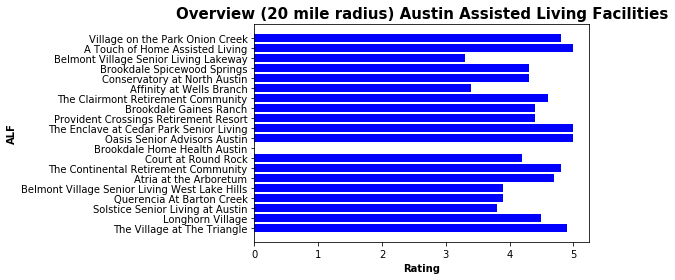

<Figure size 432x288 with 0 Axes>

In [60]:
# Overall Austin Assisted Living Facilities within a 20 mi radius
# Set the title and labels
plt.title("Overview (20 mile radius) Austin Assisted Living Facilities", fontweight ='bold', fontsize =15)
plt.xlabel("Rating", fontweight='bold')
plt.ylabel("ALF", fontweight='bold')
y_axis = alf_overview_pd["Rating"]
x_axis = alf_overview_pd["Name"]

alf_overview_average = alf_overview_pd["Rating"].mean

#tick_locations = [value+0.4 for value in x_axis]
tick_locations = (range(0, len(y_axis)))

plt.barh(x_axis, y_axis, color='blue', align='center')
# fig.
# fig1 = plt.gcf()
# #display the graph
# plt.show()
# plt.draw()
# # save the graph to a file
# plt.savefig("overview_alf_ratings.pdf")
fig = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig.savefig("overview_alf_ratings.pdf")


## Graph the average ratings of the areas in Austin for the hospitals vs the assisted living locations

In [25]:
# Exclude rating of 0.0 for each assisted living facility for the averages
a_north = alf_north_pd.copy()
a_north = a_north.replace(0.0, np.nan)
a_north = a_north.dropna(how='all', axis=0)

a_west = alf_west_pd.copy()
a_west = a_west.replace(0.0, np.nan)
a_west = a_west.dropna(how='all', axis=0)

a_south = alf_south_pd.copy()
a_south = a_south.replace(0.0, np.nan)
a_south = a_south.dropna(how='all', axis=0)

a_east = alf_east_pd.copy()
a_east = a_east.replace(0.0, np.nan)
a_east = a_east.dropna(how='all', axis=0)

a_central = alf_central_pd.copy()
a_central = a_central.replace(0.0, np.nan)
a_central = a_central.dropna(how='all', axis=0)

# get the average rating with 0 ratings removed
alf_north_average = a_north["Rating"].mean()
alf_south_average = a_south["Rating"].mean()
alf_east_average = a_east["Rating"].mean()
alf_west_average = a_west["Rating"].mean()
alf_central_average = a_central["Rating"].mean()


alf_ratings ={'area':['North','South', 'East', 'West', 'Central'],
    "ave_rating":[alf_north_average, alf_south_average, alf_east_average, alf_west_average, alf_central_average ]
}

# Create DataFrame
df = pd.DataFrame(alf_ratings)
 
# Print the output.
print(df)

      area  ave_rating
0    North    4.136842
1    South    4.200000
2     East    4.136842
3     West    4.300000
4  Central    4.178571


In [26]:
# EXCLUDE RATINGS OF 0.0 for each hospital for the averages
h_north = hosp_north_pd.copy()
h_north = h_north.replace(0.0, np.nan)
h_north= h_north.dropna(how='all', axis=0)

h_west = hosp_west_pd.copy()
h_west = h_west.replace(0.0, np.nan)
h_west= h_west.dropna(how='all', axis=0)

h_south = hosp_south_pd.copy()
h_south = h_south.replace(0.0, np.nan)
h_south= h_south.dropna(how='all', axis=0)

h_east = hosp_east_pd.copy()
h_east = h_east.replace(0.0, np.nan)
h_east= h_east.dropna(how='all', axis=0)

h_central = hosp_central_pd.copy()
h_central = h_central.replace(0.0, np.nan)
h_central= h_central.dropna(how='all', axis=0)

# get the average rating with 0 ratings removed
hosp_north_average = h_north["Rating"].mean()
hosp_south_average = h_south["Rating"].mean()
hosp_east_average = h_east["Rating"].mean()
hosp_west_average = h_west["Rating"].mean()
hosp_central_average = h_central["Rating"].mean()

hosp_ratings ={'area':['North','South', 'East', 'West', 'Central'],
    "ave_rating":[hosp_north_average, hosp_south_average, hosp_east_average, hosp_west_average, hosp_central_average ]
}

# Create DataFrame
df2 = pd.DataFrame(hosp_ratings)
 
# Print the output.
print(df2)


      area  ave_rating
0    North    3.418750
1    South    3.600000
2     East    4.300000
3     West    3.418750
4  Central    3.470588


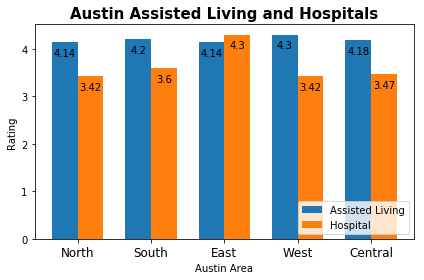

<Figure size 432x288 with 0 Axes>

In [51]:
# creating the bar graph that coompares the hospital average ratings with the assisted living facility ratings
# create labels for the hospital/living facility areas (north, south, east, west, central)
labels = hosp_ratings["area"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, alf_ratings["ave_rating"] , width, label='Assisted Living')
rects2 = ax.bar(x + width/2, hosp_ratings["ave_rating"], width, label='Hospital')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rating')
ax.set_xlabel('Austin Area')
ax.set_title('Austin Assisted Living and Hospitals', fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc="lower right")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,-16),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig1 = plt.gcf()
#display the graph
plt.show()
plt.draw()
# save the graph to a file
fig1.savefig("average_ratings_all.pdf")


## Show a heat map of the hospitals in Austin with an overlay of assisted living locations

In [28]:
# Using the overview (20 mi radius from the center of Austin) of hospitals and assisted living facilities to draw a
# heatmap of the hospitals by rating with an overlay of the assisted living facility locations. Click on each
# to show the name.
h_locations = hosp_overview_pd[['Lat','Long']].astype(float)
h_ratings = hosp_overview_pd["Rating"].astype(float)

a_locations = alf_overview_pd[['Lat','Long']].astype(float)
a_ratings = alf_overview_pd["Rating"].astype(float)
a_names = alf_overview_pd["Name"]

# create the heatmap layer of the hospital locations with their ratings
hosp_layer = gmaps.heatmap_layer(h_locations, weights=h_ratings)

# create the symbol layer of the assisted living facilities. 
#If you click on a symbol, the name of the facility will be displayed
alf_layer = gmaps.symbol_layer(
    a_locations, fill_color='blue',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2, 
    info_box_content=[f"Facility: {name}" for name in a_names]
)

fig = gmaps.figure()
fig.add_layer(hosp_layer)
fig.add_layer(alf_layer)

#display the map
fig


Figure(layout=FigureLayout(height='420px'))